In [43]:
# TASK-4
# OASIS INFOBYTE INTERNSHIP
# Email Spam Detection
# MAY-2023

In [44]:
import numpy as np 
import pandas as pd 
import os
for dirname, _, filenames in os.walk('/harsh/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [45]:
data= pd.read_csv("C:\\Users\\harsh\\Downloads\\archive (2).zip", encoding= 'latin_1')

In [46]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [47]:
# Drop the last 3 columns
data.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'], axis=1, inplace=True)


In [48]:
# Rename the columns to be understandable

data.rename(columns={'v1': 'Target', 'v2': 'Email'}, inplace=True)
data.head()

,Target,Email
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [49]:
# Mapping the target labels to 0 and 1
data['Target']=data['Target'].map({'ham': 0, 'spam': 1})

data.head()

,Target,Email
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
#Setting a color palette
palette=sns.color_palette('magma')
sns.set(palette=palette)

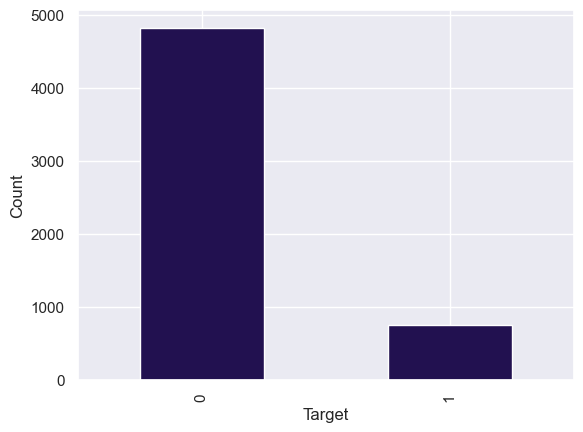

In [51]:
# Plotting Spam(1) vs Not Spam(0) value counts
data['Target'].value_counts().plot(kind='bar')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

In [52]:
# Split the data
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid= train_test_split(data['Email'], data['Target'], test_size=0.2, random_state=0)
X_train.head()

1114    No no:)this is kallis home ground.amla home to...
3589    I am in escape theatre now. . Going to watch K...
3095    We walked from my moms. Right on stagwood pass...
1012       I dunno they close oredi not... ÌÏ v ma fan...
3320                               Yo im right by yo work
Name: Email, dtype: object

In [53]:
# Funtion to build and visualise a confusion matrix
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
def my_confusion_matrix(y_test, y_pred, plt_title, accuracy_title):
    cm = confusion_matrix(y_test, y_pred)
    print(f'{accuracy_title} Accuracy Score:', '{:.2%}'.format(accuracy_score(y_valid, y_pred)))
    print(classification_report(y_test, y_pred))
    sns.heatmap(cm, annot=True, fmt='g', cbar=False, cmap='magma')
    plt.xlabel('Predicted Values')
    plt.ylabel('Actual Values')
    plt.title(plt_title)
    plt.show()
    return cm

In [54]:
X_train.isnull().any()

False

In [55]:
from sklearn.feature_extraction.text import TfidfVectorizer
# removing stopwords

tfidf = TfidfVectorizer(stop_words='english')

#Replace NaN with an empty string if there are nans

# Construct the required TF-IDF matrix by fitting and transforming the data

tfidf_matrix_train = tfidf.fit_transform(X_train)
tfidf_matrix_valid= tfidf.transform(X_valid)

tfidf_matrix_train.shape

(4457, 7351)

In [56]:
# PERFOEM KNN( K-NEAREST NEIGHBOUR ALGORITHM)

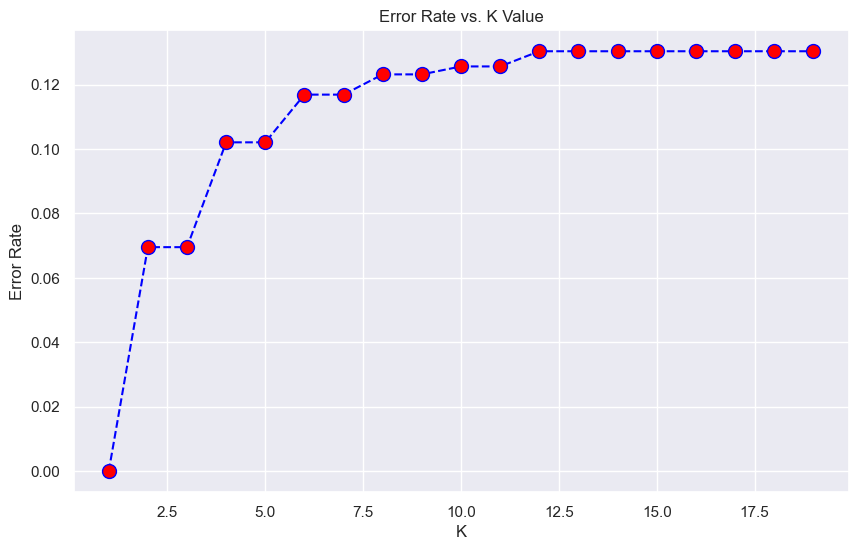

In [57]:
# Visualize to find the best K value

from sklearn.neighbors import KNeighborsClassifier
#To find the optimal k value:- K=((Sqrt(N)/2)
#Visualisation for the Error Rate/K-value 

error_rate = []
for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=i, metric = 'minkowski', p=1)
    knn.fit(tfidf_matrix_train, y_train)
    pred_i_knn = knn.predict(tfidf_matrix_train)
    error_rate.append(np.mean(pred_i_knn != y_train))
plt.figure(figsize=(10,6))
plt.plot(range(1,20),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

KNN Accuracy Score: 85.56%
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       949
           1       1.00      0.03      0.06       166

    accuracy                           0.86      1115
   macro avg       0.93      0.52      0.49      1115
weighted avg       0.88      0.86      0.79      1115



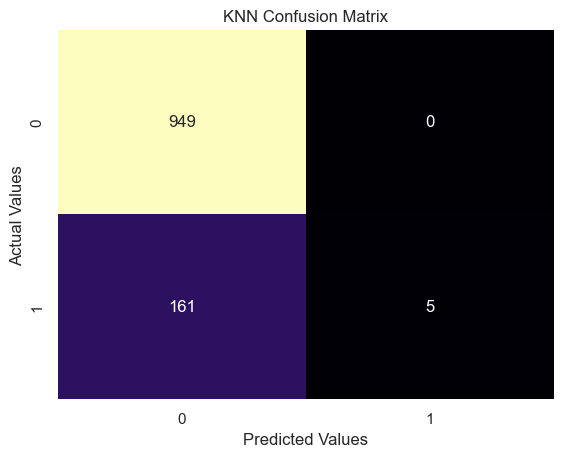

In [58]:
#Fitting the KNN model

knn_classifier = KNeighborsClassifier(n_neighbors = 1, metric = 'minkowski', p=1)
knn_classifier.fit(tfidf_matrix_train, y_train)
y_pred_knn=knn_classifier.predict(tfidf_matrix_valid)
cm_knn=my_confusion_matrix(y_valid, y_pred_knn, 'KNN Confusion Matrix', 'KNN')

In [59]:
# LOGISTIC REGRESSION

Logistic Regression: Accuracy Score: 95.61%
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       949
           1       0.99      0.71      0.83       166

    accuracy                           0.96      1115
   macro avg       0.97      0.85      0.90      1115
weighted avg       0.96      0.96      0.95      1115



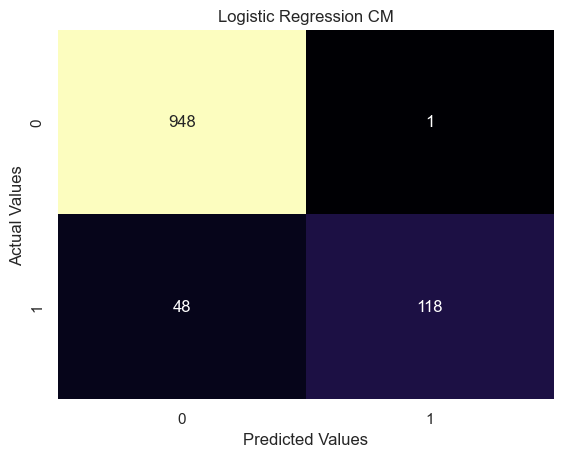

array([[948,   1],
       [ 48, 118]], dtype=int64)

In [60]:
#Train the model
from sklearn.linear_model import LogisticRegression
log_reg_classifier=LogisticRegression(solver='liblinear')
log_reg_classifier.fit(tfidf_matrix_train, y_train)
y_pred_log=log_reg_classifier.predict(tfidf_matrix_valid)
my_confusion_matrix(y_valid, y_pred_log, 'Logistic Regression CM', 'Logistic Regression:')

In [61]:
# RANDOM FOREST CLASSIFIER (RFC)

Random Forest Accuracy Score: 97.13%
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       949
           1       1.00      0.81      0.89       166

    accuracy                           0.97      1115
   macro avg       0.98      0.90      0.94      1115
weighted avg       0.97      0.97      0.97      1115



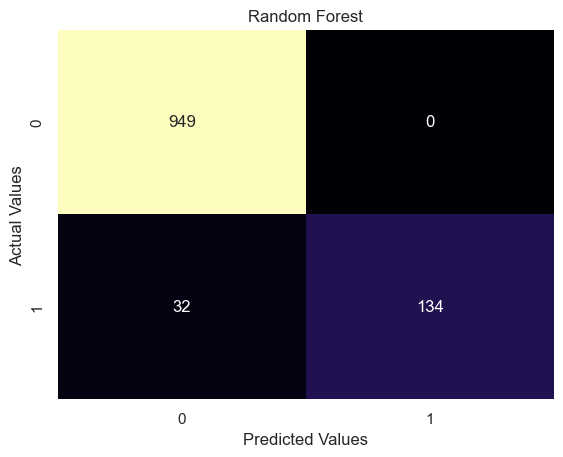

[[949   0]
 [ 32 134]]


In [62]:
# Random Forest

from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(tfidf_matrix_train, y_train)
y_pred_rfc=rfc.predict(tfidf_matrix_valid)
print(my_confusion_matrix(y_valid, y_pred_rfc, 'Random Forest', 'Random Forest'))

In [63]:
# SUPPORT VECTOR CLASSIFIER(SVC)

SVC Accuracy Score: 98.03%
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       949
           1       0.99      0.87      0.93       166

    accuracy                           0.98      1115
   macro avg       0.99      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115



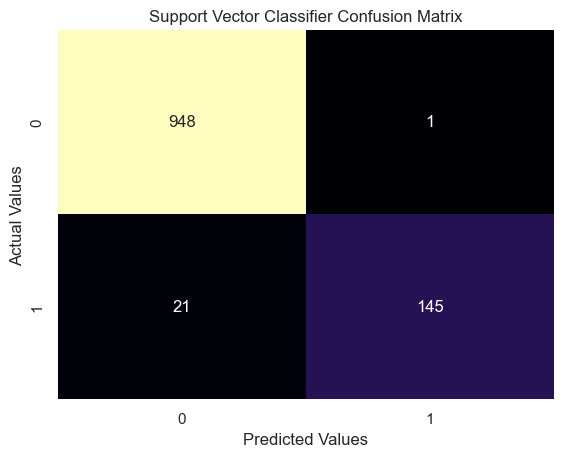

In [64]:
# SVC

from sklearn.svm import SVC
svc = SVC(kernel='rbf', C=10)
svc.fit(tfidf_matrix_train, y_train)
y_pred_svc= svc.predict(tfidf_matrix_valid)
cm_svc=my_confusion_matrix(y_valid, y_pred_svc, 'Support Vector Classifier Confusion Matrix', 'SVC')

In [65]:
# MULTILAYER PERCEPTRON (MLP)

MLP Accuracy Score: 98.57%
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       949
           1       0.99      0.91      0.95       166

    accuracy                           0.99      1115
   macro avg       0.99      0.95      0.97      1115
weighted avg       0.99      0.99      0.99      1115



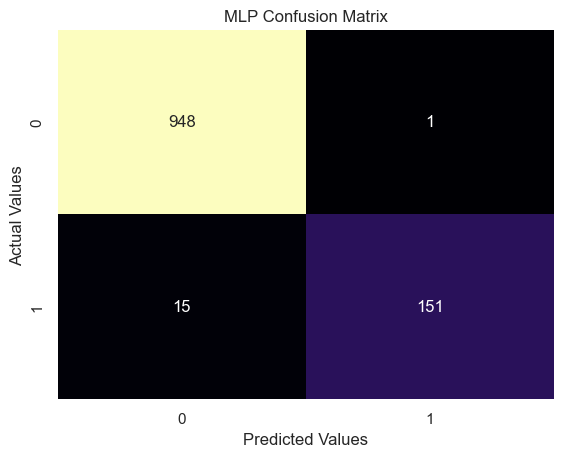

array([[948,   1],
       [ 15, 151]], dtype=int64)

In [66]:
# MLP Classifier

from sklearn.neural_network import MLPClassifier
mlp=MLPClassifier()
mlp.fit(tfidf_matrix_train, y_train)
y_pred_mlp=mlp.predict(tfidf_matrix_valid)
my_confusion_matrix(y_valid, y_pred_mlp, 'MLP Confusion Matrix', 'MLP')

In [67]:
# NEURAL NETWORKS

35/35 [==============================] - 0s 9ms/step
Neural Network Accuracy: Accuracy Score: 98.48%
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       949
           1       0.98      0.92      0.95       166

    accuracy                           0.98      1115
   macro avg       0.98      0.96      0.97      1115
weighted avg       0.98      0.98      0.98      1115



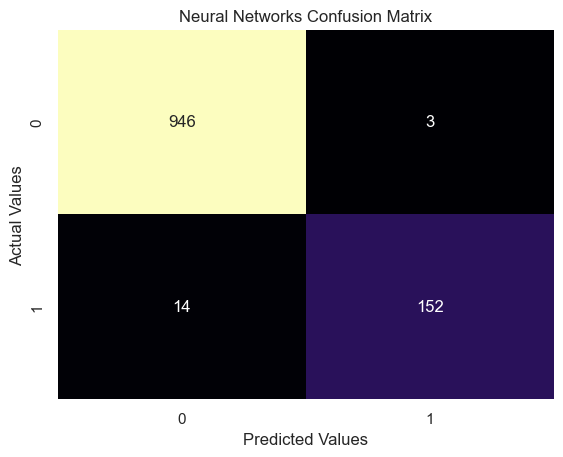

array([[946,   3],
       [ 14, 152]], dtype=int64)

In [68]:
# Changing from csr matrix to array 

tfidf_matrix_train=tfidf_matrix_train.toarray()
tfidf_matrix_valid=tfidf_matrix_valid.toarray()

# Using Neural Networks

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(tfidf_matrix_train.shape[1],)))
model.add(Dropout(0.3))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid')) 

model.compile(loss='binary_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_accuracy', 
                   mode='max', # don't minimize the accuracy!
                   patience=10,
                   restore_best_weights=True)

NN_Classifier = model.fit(tfidf_matrix_train, y_train,
                    batch_size=100,
                    epochs=1000,
                    callbacks =[es],
                    verbose=0,
                    validation_data=(tfidf_matrix_valid, y_valid))

y_pred_NN=(model.predict(tfidf_matrix_valid) > 0.5).astype(int)
my_confusion_matrix(y_valid, y_pred_NN, 'Neural Networks Confusion Matrix', 'Neural Network Accuracy:')

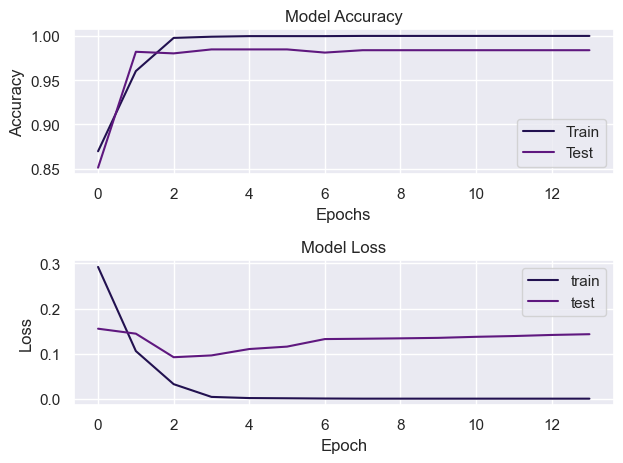

In [69]:
# Plotting Neural Network Training
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(NN_Classifier.history['accuracy'])
plt.plot(NN_Classifier.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(NN_Classifier.history['loss'])
plt.plot(NN_Classifier.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.tight_layout()
plt.show()